In [23]:
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

%load_ext autoreload
%autoreload 2

omitted edges tensor([], size=(2, 0))
omitted non edges tensor([], size=(2, 0))
new_edge_index tensor([[0, 0, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5],
        [4, 5, 5, 3, 5, 2, 5, 0, 5, 0, 1, 2, 3, 4]])
new_edge_attr tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True])


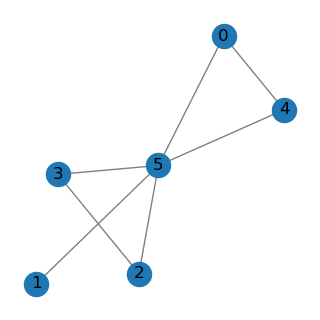

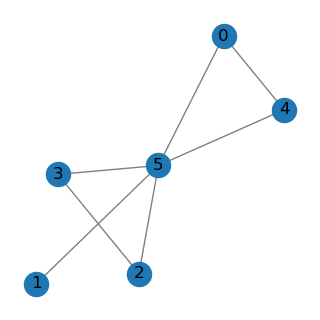

omitted edges tensor([], size=(2, 0))
omitted non edges tensor([], size=(2, 0))
new_edge_index tensor([[0, 0, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5],
        [4, 5, 5, 3, 5, 2, 5, 0, 5, 0, 1, 2, 3, 4]])
new_edge_attr tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True])


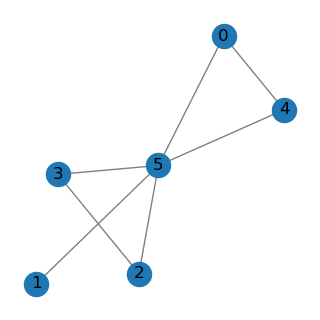

In [28]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from torch_geometric import utils
import sys

if '..' not in sys.path:
    sys.path.insert(0, '..')

from utils.plotting import plot_graph_with_omitted
import link_prediction as lp


data = Data(edge_index=torch.tensor([[0, 0, 1, 3, 3, 5, 5],
                                     [5, 4, 5, 2, 5, 2, 4]]))

data.edge_attr = torch.tensor([1,1,1,1,1, 1,1]).bool()

data.edge_index, data.edge_attr = utils.to_undirected(data.edge_index, data.edge_attr)

#? TEST that dyad omittion makes sense for all attrs 1 (when omitting test)
#todo: make get_dyads_to_omit handle sampling rate of 0
dyads_to_omit_test = lp.get_dyads_to_omit(data.edge_index, data.edge_attr, p_sample_edge=0.0)
data_omitted1 = Data(edge_index=dyads_to_omit_test[2], edge_attr=dyads_to_omit_test[3])

print('omitted edges', dyads_to_omit_test[0])
print('omitted non edges', dyads_to_omit_test[1])
print('new_edge_index', data_omitted1.edge_index)
print('new_edge_attr', data_omitted1.edge_attr)

pos = plot_graph_with_omitted(data)
plot_graph_with_omitted(data_omitted1, pos)

#? TESTED that dyads omittiion makes sense for when the edge index has omitted dyads.
dyads_to_omit_val = lp.get_dyads_to_omit(data_omitted1.edge_index, data_omitted1.edge_attr, p_sample_edge=0.0)
data_omitted2 = Data(edge_index=dyads_to_omit_val[2], edge_attr=dyads_to_omit_val[3])

print('omitted edges', dyads_to_omit_val[0])
print('omitted non edges', dyads_to_omit_val[1])
print('new_edge_index', data_omitted2.edge_index)
print('new_edge_attr', data_omitted2.edge_attr)

plot_graph_with_omitted(data_omitted2, pos)
#? TEST
